In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 

from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score

from sklearn.model_selection import train_test_split

Importing the data

In [2]:
df = pd.read_csv("GermanCredit.csv")

## Data Exploration

1000 records, 21 variables (20 features, 1 response)

In [3]:
df.shape

(1000, 21)

In [4]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


Identifying binary, categorical, and continuous variables

In [5]:
for _ in df.columns:
    print(_, ":", len(df[_].unique()))

status : 4
duration : 33
credit_history : 5
purpose : 10
amount : 921
savings : 5
employment_duration : 5
installment_rate : 4
personal_status_sex : 4
other_debtors : 3
present_residence : 4
property : 4
age : 53
other_installment_plans : 3
housing : 3
number_credits : 4
job : 4
people_liable : 2
telephone : 2
foreign_worker : 2
credit_risk : 2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [7]:
df.describe()

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


## Data Preprocessing

Enumerating categorical variables for later processing

In [8]:
categorical = ["status", "credit_history", "purpose", "savings", "employment_duration", "personal_status_sex", "other_debtors",
               "property", "other_installment_plans", "housing", "job"]

Map binary variables to integers

In [9]:
df["telephone"] = df["telephone"].map({"yes":1, "no":0})

In [10]:
df["foreign_worker"] = df["foreign_worker"].map({"yes":1, "no":0})

Isolate continuous and binary variables

In [11]:
cont_df = df.drop(columns=categorical)

In [12]:
cont_df

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,6,1169,4,4,67,2,1,1,1,1
1,48,5951,2,2,22,1,1,0,1,0
2,12,2096,2,3,49,1,2,0,1,1
3,42,7882,2,4,45,1,2,0,1,1
4,24,4870,3,4,53,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1
996,30,3857,4,4,40,1,1,1,1,1
997,12,804,4,4,38,1,1,0,1,1
998,45,1845,4,4,23,1,1,1,1,0


In [13]:
[_ for _ in df.columns if _ not in categorical]

['duration',
 'amount',
 'installment_rate',
 'present_residence',
 'age',
 'number_credits',
 'people_liable',
 'telephone',
 'foreign_worker',
 'credit_risk']

Isolate categorical variables

In [14]:
cat_df = df.drop(columns=[_ for _ in df.columns if _ not in categorical])

In [15]:
cat_df

,status,credit_history,purpose,savings,employment_duration,personal_status_sex,other_debtors,property,other_installment_plans,housing,job
0,... < 100 DM,critical account/other credits existing,domestic appliances,unknown/no savings account,... >= 7 years,male : single,none,real estate,none,own,skilled employee/official
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee/official
2,no checking account,critical account/other credits existing,retraining,... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident
3,... < 100 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,building society savings agreement/life insurance,none,for free,skilled employee/official
4,... < 100 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown/no property,none,for free,skilled employee/official
...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,female : divorced/separated/married,none,real estate,none,own,unskilled - resident
996,... < 100 DM,existing credits paid back duly till now,car (used),... < 100 DM,1 <= ... < 4 years,male : divorced/separated,none,building society savings agreement/life insurance,none,own,management/self-employed/highly qualified empl...
997,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,... >= 7 years,male : single,none,car or other,none,own,skilled employee/official
998,... < 100 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,male : single,none,unknown/no property,none,for free,skilled employee/official


One-hot encoding of categorical varaibles

In [16]:
enc = OneHotEncoder(sparse_output=False)
temp = pd.DataFrame(enc.fit_transform(cat_df))
temp.columns = enc.get_feature_names_out(cat_df.columns)
clean_df = pd.concat([cont_df, temp], axis=1)

In [17]:
clean_df

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/self-employed/highly qualified employee/officer,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,6,1169,4,4,67,2,1,1,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,48,5951,2,2,22,1,1,0,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,12,2096,2,3,49,1,2,0,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,42,7882,2,4,45,1,2,0,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24,4870,3,4,53,2,2,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,30,3857,4,4,40,1,1,1,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,12,804,4,4,38,1,1,0,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
998,45,1845,4,4,23,1,1,1,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Splitting Data

Separate features and response

In [18]:
y = clean_df["credit_risk"]

In [19]:
X = clean_df.drop(columns="credit_risk")

In [20]:
X

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,status_... < 100 DM,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/self-employed/highly qualified employee/officer,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,6,1169,4,4,67,2,1,1,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,48,5951,2,2,22,1,1,0,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,12,2096,2,3,49,1,2,0,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,42,7882,2,4,45,1,2,0,1,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24,4870,3,4,53,2,2,0,1,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,30,3857,4,4,40,1,1,1,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,12,804,4,4,38,1,1,0,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
998,45,1845,4,4,23,1,1,1,1,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Splitting the data (80:20)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,status_... < 100 DM,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/self-employed/highly qualified employee/officer,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
29,60,6836,3,4,63,2,1,1,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
535,21,2319,2,1,33,1,1,0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
695,6,1236,2,4,50,1,1,0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
557,21,5003,1,4,29,2,1,1,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
836,12,886,4,2,21,1,1,0,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,18,6458,2,4,39,2,2,1,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
270,18,2662,4,3,32,1,1,0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,24,5804,4,2,27,2,1,0,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
435,12,1484,2,1,25,1,1,1,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Model Training & Evaluation

Training logistic regression model us sklearn

In [23]:
logMod = LogisticRegression(max_iter=1000, solver="newton-cholesky")

In [24]:
logMod.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cholesky')

In [25]:
yhat = logMod.predict(X_test)

Performance metrics

In [26]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62        59
           1       0.83      0.90      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



Examine coefficients

In [27]:
for col, coef in list(zip(clean_df.columns, logMod.coef_[0])):
    
    print(col, ":", coef)

duration : -0.021590845895689915
amount : -0.00012123497026152649
installment_rate : -0.305803106106264
present_residence : -0.028424340777110237
age : 0.028339861787621046
number_credits : -0.31640156507200534
people_liable : -0.1871484012930663
telephone : 0.2506603819277886
foreign_worker : -0.9047638483770364
credit_risk : -0.73720230791424
status_... < 100 DM : 0.24773520075329275
status_... >= 200 DM / salary for at least 1 year : -0.32180718822403687
status_0 <= ... < 200 DM : 0.8112742953849852
status_no checking account : -0.5256650078280954
credit_history_all credits at this bank paid back duly : 0.7883230207951791
credit_history_critical account/other credits existing : 0.338369908831932
credit_history_delay in paying off in the past : -0.017482382801186636
credit_history_existing credits paid back duly till now : -0.5835455389978295
credit_history_no credits taken/all credits paid back duly : 0.5424009202152388
purpose_business : -0.6896301261585672
purpose_car (new) : 0.81

Training second model using statsmodels

In [28]:
logMod2 = sm.Logit(y_train, X_train).fit(method="newton")

Optimization terminated successfully.
         Current function value: 0.452720
         Iterations 8


Performance metrics for statsmodels

In [29]:
print(classification_report(y_test, np.round(logMod2.predict(X_test))))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63        59
           1       0.84      0.88      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.79      0.80      0.79       200



Model summary for statsmodel

In [30]:
print(logMod2.summary())

                           Logit Regression Results                           
Dep. Variable:            credit_risk   No. Observations:                  800
Model:                          Logit   Df Residuals:                      751
Method:                           MLE   Df Model:                           48
Date:                Wed, 05 Jun 2024   Pseudo R-squ.:                  0.2602
Time:                        17:20:02   Log-Likelihood:                -362.18
converged:                       True   LL-Null:                       -489.54
Covariance Type:            nonrobust   LLR p-value:                 5.988e-30
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
duration                                                          -0.0210      0.010     -2.032      0.042

Comparison of coefficients from each model

In [31]:
output = pd.read_html(logMod2.summary().tables[1].as_html(), header=0, index_col=0)

In [32]:
comparison = pd.concat([output[0]["coef"], pd.Series(logMod.coef_[0], index=X.columns)], axis=1)

In [33]:
comparison["compare"] = abs(output[0]["coef"] - logMod.coef_[0])

In [34]:
comparison = comparison.rename(columns={"coef":"statsmodel", 0:"sklearn"})

In [35]:
comparison

,statsmodel,sklearn,compare
duration,-0.0210,-0.021591,0.000591
amount,-0.0001,-0.000121,0.000021
installment_rate,-0.3206,-0.305803,0.014797
present_residence,-0.0243,-0.028424,0.004124
age,0.0288,0.028340,0.000460
number_credits,-0.3569,-0.316402,0.040498
people_liable,-0.2110,-0.187148,0.023852
telephone,0.2766,0.250660,0.025940
foreign_worker,-1.3919,-0.904764,0.487136
status_... < 100 DM,-0.4330,-0.737202,0.304202


In [36]:
np.mean(comparison["compare"])

0.27574113238838677

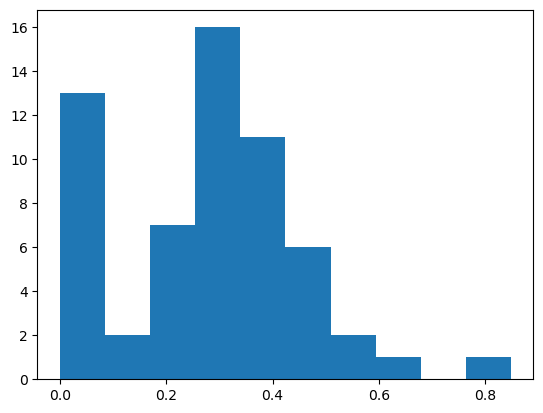

In [37]:
plt.hist(comparison["compare"])
plt.show()

ROC curve for model from statsmodels

In [56]:
fpr, tpr, thresh = roc_curve(y_test, logMod2.predict(X_test))

In [60]:
roc_auc = auc(fpr, tpr)

Area under curve

In [63]:
roc_auc

0.8180069719918259

Plotting the ROC curve

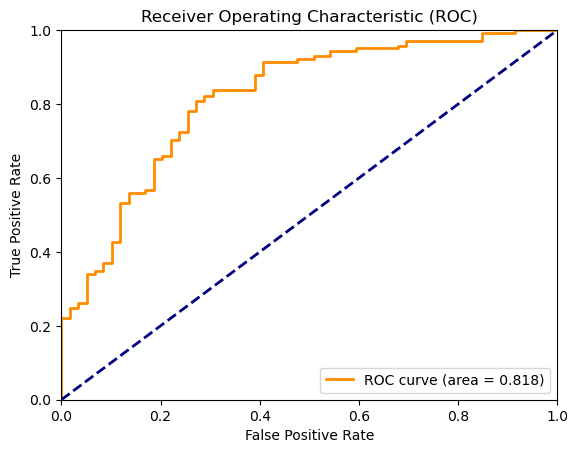

In [81]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label=f"ROC curve (area = {np.round(roc_auc, 3)})"
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

Estimate optimal threshold

In [68]:
t = np.argmax(np.sqrt((1- fpr**2 + tpr**2)))

In [69]:
thresh[t]

0.49223382678330974

Checking performance of estimated threshold

In [72]:
print(classification_report(y_test, [0 if _ <= thresh[t] else 1 for _ in logMod2.predict(X_test)]))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65        59
           1       0.84      0.91      0.87       141

    accuracy                           0.81       200
   macro avg       0.79      0.75      0.76       200
weighted avg       0.81      0.81      0.81       200



More accurate testing of thresholds relative to accuracy score 

In [107]:
accuracies = []
xx = np.linspace(0,1,1000)

for t in xx:

    accuracies.append(accuracy_score(y_test, [0 if _ <= t else 1 for _ in logMod2.predict(X_test)]))


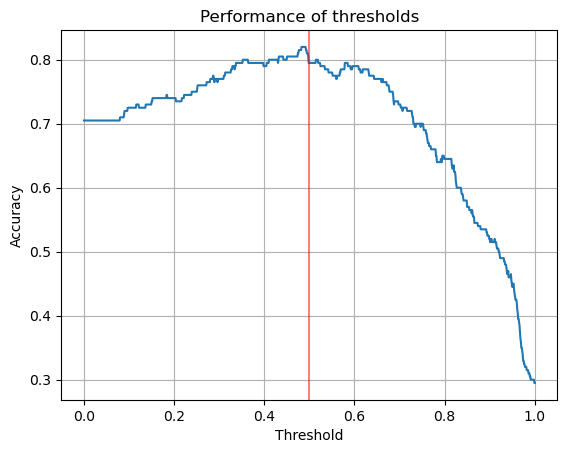

In [108]:
plt.plot(xx, accuracies)
plt.axvline(x=0.5, color="r", alpha=0.5)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Performance of thresholds")
plt.grid()

In [109]:
np.max(accuracies)

0.82

In [110]:
xx[np.argmax(accuracies)]

0.4824824824824825

Confirming accuracy score for optimal threshold for model

In [111]:
print(classification_report(y_test, [0 if _ <= 0.4824824824824825 else 1 for _ in logMod2.predict(X_test)]))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66        59
           1       0.84      0.91      0.88       141

    accuracy                           0.82       200
   macro avg       0.79      0.75      0.77       200
weighted avg       0.81      0.82      0.81       200



## Comparing Alternative Feature Selections

Model using only continuous and binary variables

In [38]:
logMod3 = LogisticRegression(max_iter=1000)

In [39]:
X2 = cont_df.drop(columns="credit_risk")

In [40]:
y2 = cont_df["credit_risk"]

In [41]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [42]:
logMod3.fit(X_train2, y_train2)

LogisticRegression(max_iter=1000)

In [43]:
yhat2 = logMod3.predict(X_test2)

In [44]:
print(classification_report(y_test2, yhat2))

              precision    recall  f1-score   support

           0       0.75      0.15      0.25        59
           1       0.73      0.98      0.84       141

    accuracy                           0.73       200
   macro avg       0.74      0.57      0.55       200
weighted avg       0.74      0.73      0.67       200



Model using only categorical variables

In [45]:
logMod4 = LogisticRegression(max_iter=1000)

In [46]:
X3 = temp

In [47]:
y3 = df["credit_risk"]

In [48]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [49]:
logMod4.fit(X_train3, y_train3)

LogisticRegression(max_iter=1000)

In [50]:
yhat3 = logMod4.predict(X_test3)

In [51]:
print(classification_report(y_test3, yhat3))

              precision    recall  f1-score   support

           0       0.60      0.47      0.53        59
           1       0.80      0.87      0.83       141

    accuracy                           0.75       200
   macro avg       0.70      0.67      0.68       200
weighted avg       0.74      0.75      0.74       200

